In [112]:
# Import necessary dependencies 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import random 

In [113]:
#Establish variable to store, read and then create df for desired data set

annual_Co2_df = pd.read_csv("../Resources/annual_Co2_per_country.csv")

annual_Co2_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [114]:
#I need to know the unique values under the entity for when I later sort by the specific countries my group will focus on. 

unique_countries = annual_Co2_df["Entity"].unique()
unique_countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (other)',
       'Andorra', 'Angola', 'Anguilla', 'Antarctic Fisheries',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia and Pacific (other)', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'D

In [115]:
#Deleted column values that I do not need to have a more focused df 
del annual_Co2_df["Code"]

annual_Co2_df.head()

,Entity,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [116]:
#Need to perform groupby organized by entity and year with an additional filter for the Annual Co2 emmissions rates 

annual_mean_Co2_per_Country_and_Year = annual_Co2_df.groupby(["Entity","Year"]).agg({"Annual CO₂ emissions (tonnes)" :["mean"]}).unstack()

annual_mean_Co2_per_Country_and_Year

Annual CO₂ emissions (tonnes)                        \
                                                   mean                         
Year                                               1751       1752       1753   
Entity                                                                          
Afghanistan                                         NaN        NaN        NaN   
Africa                                              0.0        0.0        0.0   
Albania                                             NaN        NaN        NaN   
Algeria                                             NaN        NaN        NaN   
Americas (other)                                    0.0        0.0        0.0   
...                                                 ...        ...        ...   
Wallis and Futuna Islands                           NaN        NaN        NaN   
World                                         9350528.0  9354192.0  9354192.0   
Yemen                                               NaN        NaN        NaN   
Zambia                                              NaN        NaN        NaN   
Zimbabwe                                            NaN        NaN        NaN   

                                                                         \
                                                                          
Year                            1754       1755        1756        1757   
Entity                                                                    
Afghanistan                      NaN        NaN         NaN         NaN   
Africa                           0.0        0.0         0.0         0.0   
Albania                          NaN        NaN         NaN         NaN   
Algeria                          NaN        NaN         NaN         NaN   
Americas (other)                 0.0        0.0         0.0         0.0   
...                              ...        ...         ...         ...   
Wallis and Futuna Islands        NaN        NaN         NaN         NaN   
World                      9357856.0  9361520.0  10006384.0  10010048.0   
Yemen                            NaN        NaN         NaN         NaN   
Zambia                           NaN        NaN         NaN         NaN   
Zimbabwe                         NaN        NaN         NaN         NaN   

                                                               ...  \
                                                               ...   
Year                             1758        1759        1760  ...   
Entity                                                         ...   
Afghanistan                       NaN         NaN         NaN  ...   
Africa                            0.0         0.0         0.0  ...   
Albania                           NaN         NaN         NaN  ...   
Algeria                           NaN         NaN         NaN  ...   
Americas (other)                  0.0         0.0         0.0  ...   
...                               ...         ...         ...  ...   
Wallis and Futuna Islands         NaN         NaN         NaN  ...   
World                      10013712.0  10017376.0  10017376.0  ...   
Yemen                             NaN         NaN         NaN  ...   
Zambia                            NaN         NaN         NaN  ...   
Zimbabwe                          NaN         NaN         NaN  ...   

                                                                     \
                                                                      
Year                               2008          2009          2010   
Entity                                                                
Afghanistan                4.198330e+06  6.760313e+06  8.452224e+06   
Africa                     1.178143e+09  1.188276e+09  1.193784e+09   
Albania                    4.371152e+06  4.374816e+06  4.594656e+06   
Algeria                    1.090318e+08  1.201859e+08  1.178141e+08   
Americas (other)           2.226580e+09  2.157619e+09  2.253919e+

In [132]:
# Need to perform a loc on the row and column values for the following countries United States, China, EU-28, Russia and India 

USA_annualCo2_values = annual_mean_Co2_per_Country_and_Year.loc["United States"].loc[:,"mean"].tolist()[::-1][0:4]
EU_annualCo2_values = annual_mean_Co2_per_Country_and_Year.loc["EU-28"].loc[:,"mean"].tolist()[::-1][0:4]
Russia_annualCo2_values = annual_mean_Co2_per_Country_and_Year.loc["Russia"].loc[:,"mean"].tolist()[::-1][0:4]
China_annualCo2_values = annual_mean_Co2_per_Country_and_Year.loc["China"].loc[:, "mean"].tolist()[::-1][0:4]
India_annualCo2_values = annual_mean_Co2_per_Country_and_Year.loc["India"].loc[:, "mean"].tolist()[::-1][0:4]



In [135]:
annual_Co2_df2 = pd.DataFrame({"United States": USA_annualCo2_values, 
                                        "European Union": EU_annualCo2_values, 
                                        "Russia": Russia_annualCo2_values, 
                                        "China": China_annualCo2_values, 
                                        "India": India_annualCo2_values})

annual_Co2_df2

,United States,European Union,Russia,China,India
0,5.269530e+09,3.543683e+09,1.692795e+09,9.838754e+09,2.466765e+09
1,5.310861e+09,3.503031e+09,1.668070e+09,9.704479e+09,2.377448e+09
2,5.420804e+09,3.523492e+09,1.671895e+09,9.716468e+09,2.276407e+09
3,5.568759e+09,3.490383e+09,1.667111e+09,9.820360e+09,2.207534e+09


In [149]:
annual_Co2_df2.index = ["2017", "2016", "2015", "2014"]

annual_Co2_df2

,United States,European Union,Russia,China,India
2017,5.269530e+09,3.543683e+09,1.692795e+09,9.838754e+09,2.466765e+09
2016,5.310861e+09,3.503031e+09,1.668070e+09,9.704479e+09,2.377448e+09
2015,5.420804e+09,3.523492e+09,1.671895e+09,9.716468e+09,2.276407e+09
2014,5.568759e+09,3.490383e+09,1.667111e+09,9.820360e+09,2.207534e+09


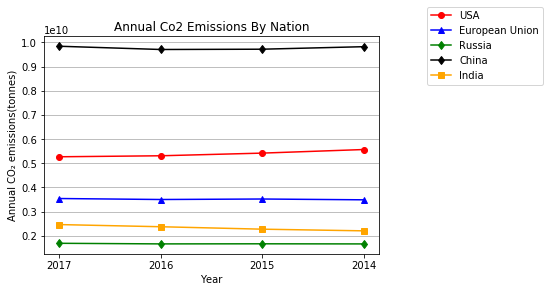

In [184]:
x_axis = ["2017", "2016", "2015", "2014"]

fig, ax = plt.subplots(1,1)

plt.errorbar(x_axis, USA_annualCo2_values, marker= "o", color="red",
                   label="USA")
plt.errorbar(x_axis, EU_annualCo2_values, marker= "^", color="blue",
                   label="European Union")
plt.errorbar(x_axis, Russia_annualCo2_values, marker= "d", color="green",
                   label="Russia")
plt.errorbar(x_axis, China_annualCo2_values, marker= "d", color="black",
                   label="China")
plt.errorbar(x_axis, India_annualCo2_values, marker= "s", color="orange",
                   label="India")


plt.xlabel("Year")
plt.ylabel("Annual CO₂ emissions(tonnes)")
plt.title("Annual Co2 Emissions By Nation")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.grid(axis="y")

plt.savefig("../Images/annual_Co2_Chart1.png", bbox_inches="tight")
plt.show()

In [169]:
annual_Co2_df3 = annual_Co2_df2

annual_Co2_df3

,United States,European Union,Russia,China,India
2017,5.269530e+09,3.543683e+09,1.692795e+09,9.838754e+09,2.466765e+09
2016,5.310861e+09,3.503031e+09,1.668070e+09,9.704479e+09,2.377448e+09
2015,5.420804e+09,3.523492e+09,1.671895e+09,9.716468e+09,2.276407e+09
2014,5.568759e+09,3.490383e+09,1.667111e+09,9.820360e+09,2.207534e+09


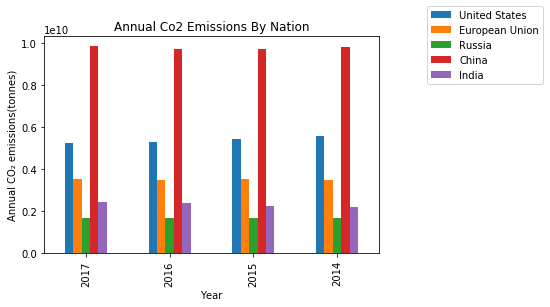

In [183]:
annual_Co2_df3.plot(kind="bar")

# Set a title for the chart
plt.title("Annual Co2 Emissions By Nation")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel("Year")
plt.ylabel("Annual CO₂ emissions(tonnes)")


plt.savefig("../Images/annual_Co2_Chart2.png", bbox_inches="tight")
plt.show()
